# Gentle Grid i

I'm thinking about different ways of presenting a gradient - it might be nice to split it into colored tiles (effectively a really low resolution gradient over a pattern)

In [1]:
import shades
import random

Let's just start with a regular gradient

In [2]:
def gradient():
    canvas = shades.Canvas(500, 800)
    ink = shades.NoiseGradient(
        color=(200, 200, 200),
        color_fields=shades.noise_fields(channels=3),
    )
    ink.fill(canvas)
    return canvas

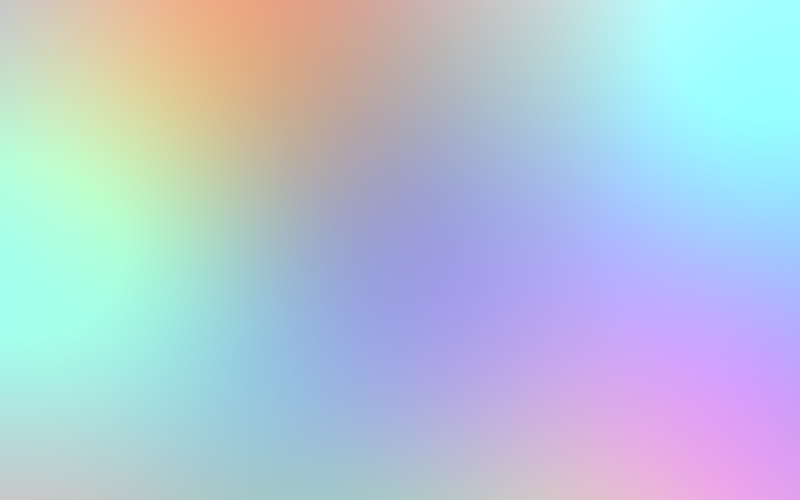

In [3]:
gradient()

Now, let's try putting it into a grid.

We'll do that by making a new Shade object that rounds off the x, y coordinates before figuring what a regular gradient would make them.

In [4]:
class GentleGrid(shades.Shade):
    def __init__(self):
        super().__init__()
        self.gradient = shades.NoiseGradient(
            color=(200, 200, 200),
            color_fields=shades.noise_fields(channels=3),
        )
        
    def determine_shade(self, xy_coords):
        new_x = (xy_coords[0] // 50) * 50
        new_y = (xy_coords[1] // 50) * 50
        return self.gradient.determine_shade((new_x, new_y))

In [5]:
def grid():
    canvas = shades.Canvas()
    x = GentleGrid()
    x.fill(canvas)
    return canvas

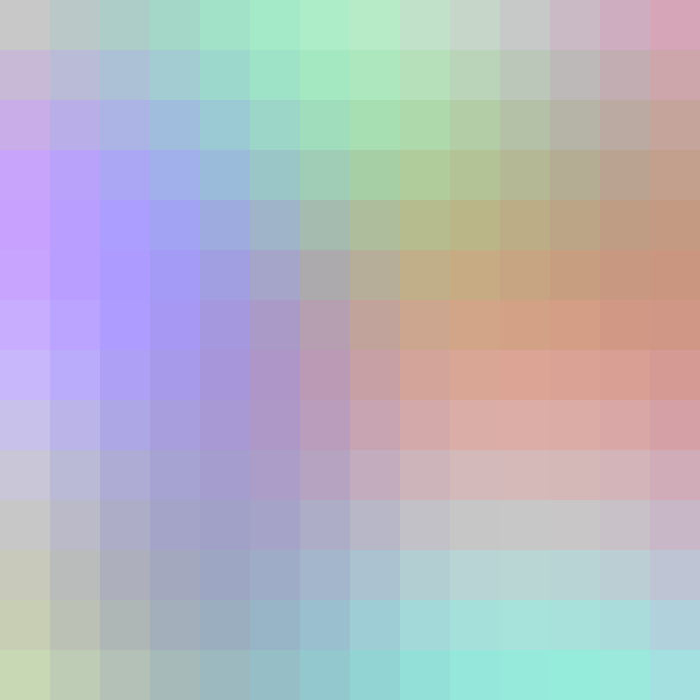

In [6]:
grid()

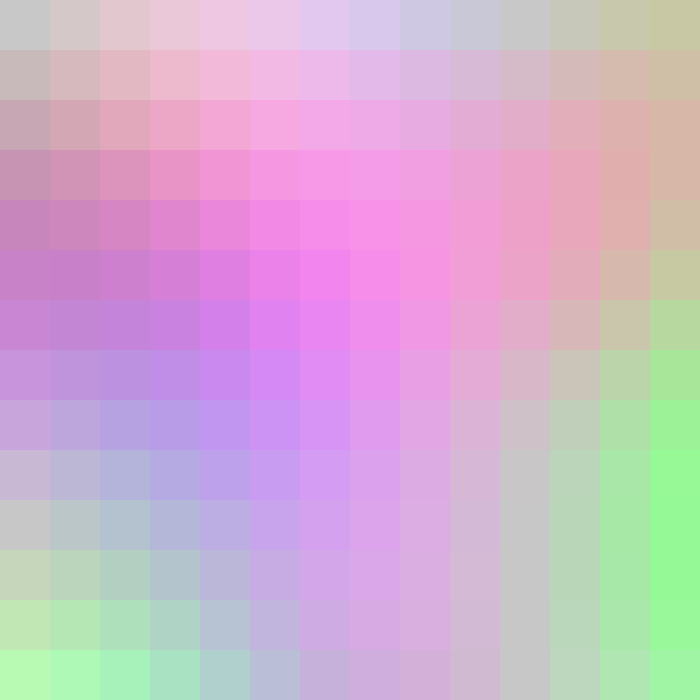

In [7]:
grid()

I like that a lot! and what about if we start randomly varying the x & y divisors out of sync? In my head, it'll make an offset/diagonal grid.

In [8]:
class ShiftedGrid(shades.Shade):
    def __init__(self):
        super().__init__()
        self.x_shift = random.random()
        self.y_shift = random.random()
        self.gradient = shades.NoiseGradient(
            color=(200, 200, 200),
            color_fields=shades.noise_fields(channels=3),
        )
        
    def determine_shade(self, xy_coords):
        xy = (xy_coords[0] + (self.x_shift * xy_coords[1]), xy_coords[1] + (self.y_shift * xy_coords[0]))
        new_x = ((xy[0] // 50) * 50)
        new_y = ((xy[1] // 50) * 50)
        return self.gradient.determine_shade((new_x, new_y))

In [9]:
def shifted_grid():
    canvas = shades.Canvas()
    x = ShiftedGrid()
    x.fill(canvas)
    return canvas

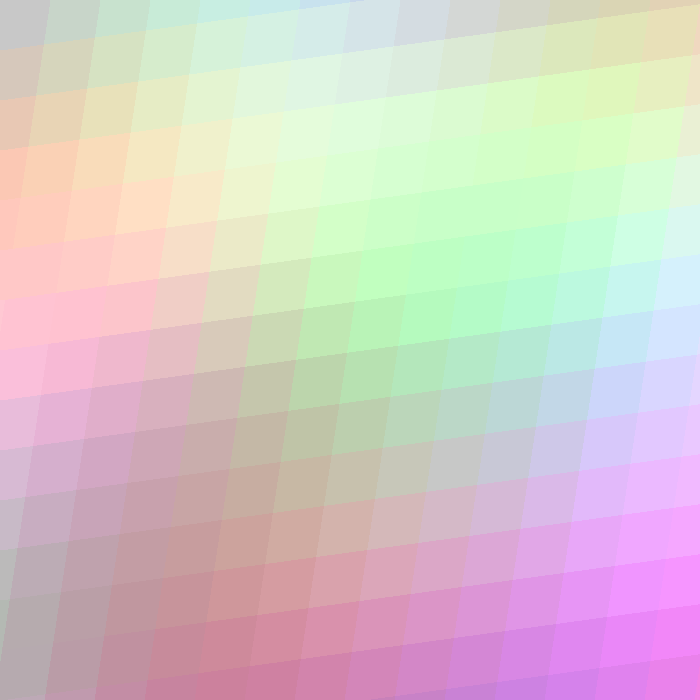

In [10]:
shifted_grid()

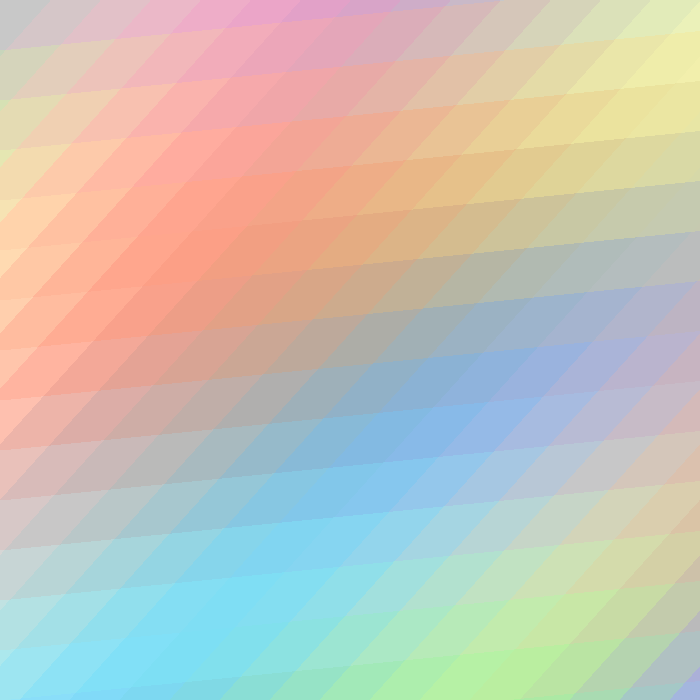

In [11]:
shifted_grid()

That actually makes me feel a little dizzy, but in a nice way.